EDA AND BASELINE MODELING

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/raw.csv',encoding='utf-8')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [18]:
df.shape

(569, 33)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# let's see if there are missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no missing values in this dataset, so we won't have to worry about dealing with them. However, if there were any, we have different options to handle them:

Delete the rows with those values (e.g., df.dropna(axis=0))

Delete the columns with those values (e.g., df.dropna(axis=1))

Replace the missing values, for example with the mean (df.fillna(df.mean())) or using some estimator.

In [20]:
# class imbalance

# Count the quantity of 'M' (malignant)
count_malignant = df[df['diagnosis'] == 'M'].shape[0]

# Count the quantity of 'B' (benign)
count_benign = df[df['diagnosis'] == 'B'].shape[0]

print("Quantity of 'M' (malignant):", count_malignant)
print("Quantity of 'B' (benign):", count_benign)

Quantity of 'M' (malignant): 212
Quantity of 'B' (benign): 357


Why we won’t handle imbalance aggressively here

The imbalance is moderate (≈60/40), not extreme (like 95/5).

Models trained on this data can still learn patterns from both classes without strong rebalancing.

Since your evaluation will focus on recall and F1-score, you’ll already catch whether the model is biased toward the majority class.

Why we mention it anyway

In real-world medical datasets, imbalance is often much worse (e.g., <10% malignant). In those cases, extra techniques are necessary:

Class weights

Oversampling / undersampling

Advanced synthetic data (e.g., SMOTE)

For your project, the main goal is learning and demonstrating a clean folder structure for ML projects. If we added balancing pipelines now, it would add complexity without adding much learning value, since this dataset is not severely imbalanced.

Conclusion

For this project, we’ll acknowledge the imbalance but not act on it.

We’ll keep it as an annex note: in more complex or severely imbalanced datasets, you’d revisit this step.

### Preprocessing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
import tensorflow as tf

2025-08-28 20:25:14.596165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-28 20:25:14.596494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-28 20:25:14.768215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-28 20:25:15.161675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-28 20:25:17.272511: W tensorflow/compiler/tf2

In [40]:
def preprocess_data(df):
        df = df.copy()
        if 'Unnamed: 32' in df.columns:
            df = df.drop(columns=['Unnamed: 32'])
        df = df.dropna()
        
        # Define mapping and store it
        encoder = {'M': 1, 'B': 0}
        labels = df['diagnosis'].map(encoder)

        features = df.drop(columns=['id', 'diagnosis'])
        return features, labels
    

    
    
def split_data(features, labels, val_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(
        features, labels,
        test_size=val_size,
        stratify=labels,
        random_state=42
    )
    return X_train, X_val, y_train, y_val
    
    
    
def standardize(X_train, X_val):
    
    scaler = StandardScaler()
    
    # Fit scaler on training set
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), # fit_transform!!!
        columns=X_train.columns,
        index=X_train.index
    )

    # Apply the scaler to val set
    X_val_scaled = pd.DataFrame(
        scaler.transform(X_val), # only transform!!
        columns=X_val.columns,
        index=X_val.index
    )

    return X_train_scaled, X_val_scaled


# create TF datasets
def tf_dataset(X, y, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X.values.astype('float32'), y.values.astype('int32')))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X))
    return ds.batch(batch_size)


In [41]:
# prep data -> train/test split -> standardize -> creat TF datasets

In [44]:
features, labels = preprocess_data(df)

X_train, X_val, y_train, y_val = split_data(features, labels)

X_train, X_val = standardize(X_train, X_val)

train_ds = tf_dataset(X_train, y_train, shuffle=True)

val_ds = tf_dataset(X_val, y_val, shuffle=False)

In [46]:
for x,y in train_ds.take(1):
    print(x, y)

tf.Tensor(
[[ 1.57306111e+00  1.33046985e+00  1.54654610e+00  1.47885728e+00
   3.85271549e-01  1.02254713e+00  2.02572489e+00  1.66199589e+00
   1.40147245e+00 -2.27607071e-01  2.90180296e-01 -3.42247821e-02
  -6.91106468e-02  4.56247717e-01 -6.53084993e-01  3.67321223e-01
   4.90069211e-01 -2.00660169e-01 -5.59745312e-01 -2.06168443e-01
   1.28246248e+00  1.26384223e+00  1.19629109e+00  1.20065963e+00
  -1.95393726e-01  8.25216055e-01  1.37907422e+00  8.64295125e-01
   6.21466279e-01  2.89997850e-02]
 [-1.56852119e-02 -1.52538288e+00 -8.85327384e-02 -1.19654335e-01
  -2.03088969e-01 -9.42877471e-01 -8.76557827e-01 -5.47006011e-01
  -1.60042655e+00 -8.20747793e-01 -5.31585157e-01 -2.48107255e-01
  -6.38239622e-01 -3.59171391e-01 -7.12799728e-02 -7.95438766e-01
  -8.29816997e-01 -8.06006849e-01 -7.54891872e-01 -4.90676135e-01
  -1.67805001e-01 -1.30167592e+00 -2.77121127e-01 -2.41821915e-01
  -1.69813246e-01 -9.14069712e-01 -1.04844952e+00 -8.47542346e-01
  -1.29201961e+00 -7.32488275e

In [53]:
input_dim = X_train.shape[1]

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


### QUICK PROTOTYPING

In [68]:
# simple baseline model
def build_compile_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ],name='baseline')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    
    return model


In [69]:
model = build_compile_model(input_dim)

In [70]:
model.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
loss, acc, prec, rec = model.evaluate(X_val, y_val, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 0.4878 - accuracy: 0.8308 - precision_1: 0.7204 - recall_1: 0.8941 - val_loss: 0.4481 - val_accuracy: 0.8333 - val_precision_1: 0.7674 - val_recall_1: 0.7857
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8857 - precision_1: 0.8138 - recall_1: 0.9000 - val_loss: 0.3782 - val_accuracy: 0.9211 - val_precision_1: 0.9459 - val_recall_1: 0.8333
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.9253 - precision_1: 0.9048 - recall_1: 0.8941 - val_loss: 0.3236 - val_accuracy: 0.9298 - val_precision_1: 0.9474 - val_recall_1: 0.8571
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.9407 - precision_1: 0.9387 - recall_1: 0.9000 - val_loss: 0.2803 - val_accuracy: 0.9386 - val_precision_1: 0.9730 - val_recall_1: 0.8571
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2641 

we can see that we achive very good results even with a simnple model and a few epochs; probalyue we dont even need a nn and simpler models could gte greta results; but again, this is for a leatrning project which goal is to make an end to end project; so it doesnt really matter, the point in this part is to prove that we can solve the prrobel  efficienmtly and have an idea about waht can work

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

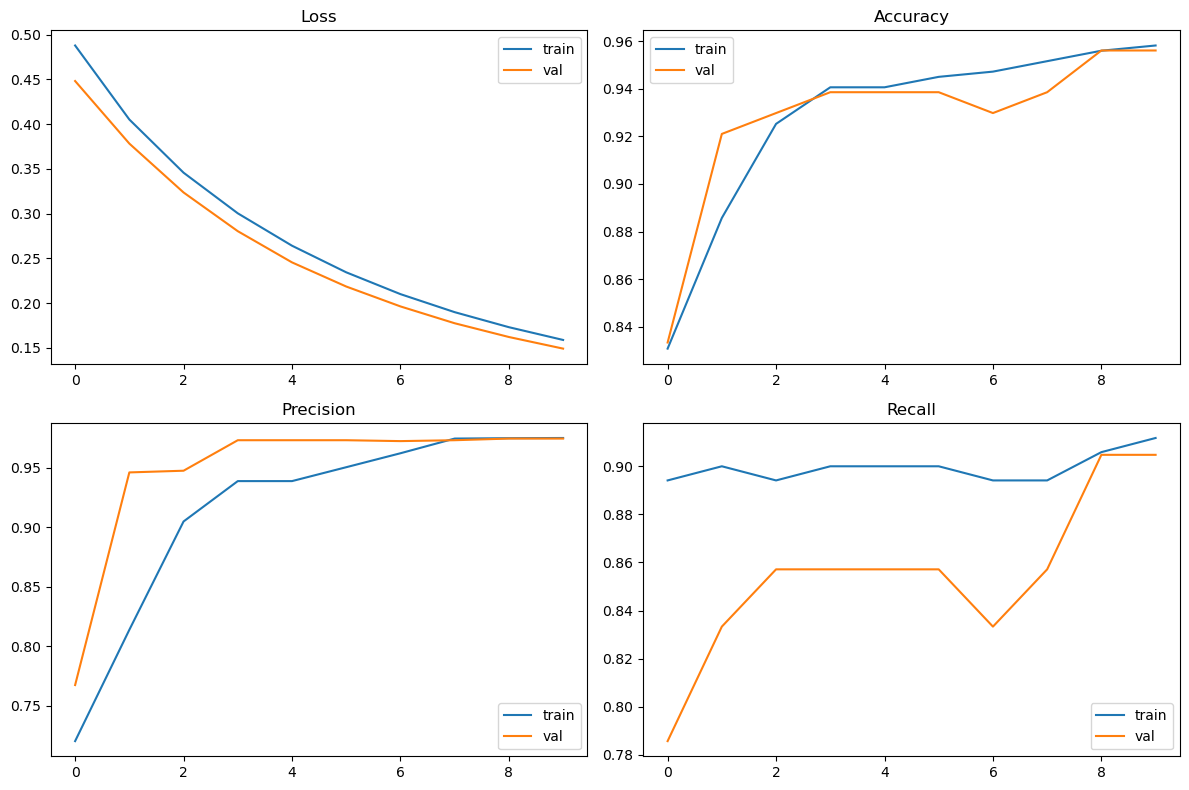

In [75]:
import matplotlib.pyplot as plt

# Plot function
def plot_history(history):
    metrics = ['accuracy', 'precision', 'recall']
    
    plt.figure(figsize=(12, 8))
    
    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy')
    plt.legend()
    
    # Precision
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision_1'], label='train')
    plt.plot(history.history['val_precision_1'], label='val')
    plt.title('Precision')
    plt.legend()
    
    # Recall
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall_1'], label='train')
    plt.plot(history.history['val_recall_1'], label='val')
    plt.title('Recall')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call it
plot_history(history)


In [ ]:
# f1-score





**ABOUT IMABALANCE**




You have:

Malignant (M): 212 samples

Benign (B): 357 samples

That gives a total of 569 samples.

👉 The class distribution is:

Malignant: 
212
/
569
≈
37
%
212/569≈37%

Benign: 
357
/
569
≈
63
%
357/569≈63%

So the dataset is imbalanced, but not extremely so. It’s roughly a 60/40 split, which is common in medical datasets where one condition (benign) is more frequent.

Why it matters

A naïve model could lean toward predicting "benign" more often and still get good accuracy, but it would miss malignant cases, which are critical in diagnosis.

This imbalance affects recall for the minority class (malignant) the most, since false negatives there are the biggest risk.

Practical notes

This imbalance is moderate. You don’t necessarily need strong balancing techniques like heavy oversampling, but you should:

Track metrics beyond accuracy (precision, recall, F1, ROC-AUC, PR-AUC).

Consider class weighting in your model (many ML libraries allow this).

If needed, try resampling techniques (SMOTE, undersampling, or balanced mini-batches).

Would you like me to show you how accuracy can be misleading with this dataset size, for example by simulating a classifier that always predicts “benign”?

Alright, let’s simulate the “always predict benign” case with your dataset:

Total samples = 569

Benign = 357

Malignant = 212

If a classifier always predicts "B" (benign):

True Negatives (TN) = 357 (all benign correctly predicted)

False Negatives (FN) = 212 (all malignant misclassified as benign)

True Positives (TP) = 0

False Positives (FP) = 0

Now, compute the metrics:

Accuracy = (TP + TN) / Total = (0 + 357) / 569 ≈ 62.7%

Precision (malignant as positive class) = TP / (TP + FP) = 0 / 0 → undefined (set to 0)

Recall (sensitivity for malignant) = TP / (TP + FN) = 0 / (0 + 212) = 0%

F1-score (malignant) = 0

👉 This shows the problem:

Accuracy looks decent (63%) but the model is useless for detecting malignant cases (the important class in practice).

This is exactly why, with imbalance, you should look at recall, precision, F1, ROC-AUC, PR-AUC, instead of just accuracy.